![](http://pic1.tsingdataedu.com/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%B7%A5%E7%A8%8B%E5%B8%88banner.png)

## 朴素贝叶斯算法的Python实现

##### by 加号, 网易云课堂 X 稀牛学院 机器学习工程师 附加课件

我们会在这里主要讲解如何使用python从0开始写出一套朴素贝叶斯算法。

导入要用的库

In [1]:
import pandas as pd
import numpy as np

伪造一些数据出来

In [2]:

# 新建一个DataFrame
data = pd.DataFrame()

# 把Y定义好
data['Gender'] = ['male','male','male','male','female','female','female','female']

# 并给定他们的属性
data['Height'] = [6,5.92,5.58,5.92,5,5.5,5.42,5.75]
data['Weight'] = [180,190,170,165,100,150,130,150]
data['Foot_Size'] = [12,11,12,10,6,8,7,9]

# 来看看长什么样子
data

,Gender,Height,Weight,Foot_Size
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


再造一个我们要预测的数据点

In [3]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Height'] = [6]
person['Weight'] = [130]
person['Foot_Size'] = [8]

# View the data
person

,Height,Weight,Foot_Size
0,6,130,8


按照上课讲的方案，做计数

In [4]:
# 男人的总数
n_male = data['Gender'][data['Gender'] == 'male'].count()

# 女人的总数
n_female = data['Gender'][data['Gender'] == 'female'].count()

# 全部的人数
total_ppl = data['Gender'].count()

计算两个最简单的概率

In [5]:
P_male = n_male/total_ppl

P_female = n_female/total_ppl

算两个指标数据，便于接下来的计算

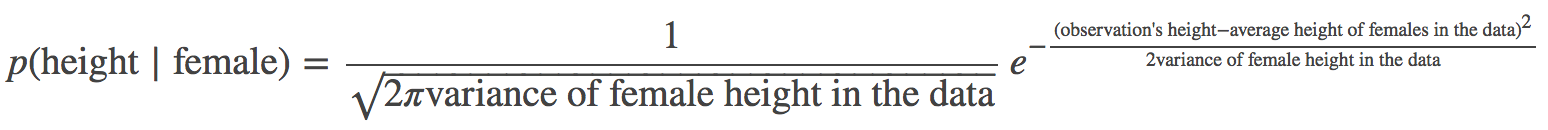

In [12]:
from IPython.display import Image
Image(filename='NB_calculation.png') 

In [6]:
data_means = data.groupby('Gender').mean()
data_means

,Height,Weight,Foot_Size
Gender,,,
female,5.4175,132.50,7.50
male,5.8550,176.25,11.25


In [7]:
data_variance = data.groupby('Gender').var()
data_variance

,Height,Weight,Foot_Size
Gender,,,
female,0.097225,558.333333,1.666667
male,0.035033,122.916667,0.916667


In [8]:
# 男人的Means
male_height_mean = data_means['Height'][data_variance.index == 'male'].values[0]
male_weight_mean = data_means['Weight'][data_variance.index == 'male'].values[0]
male_footsize_mean = data_means['Foot_Size'][data_variance.index == 'male'].values[0]

# 男人的Variance
male_height_variance = data_variance['Height'][data_variance.index == 'male'].values[0]
male_weight_variance = data_variance['Weight'][data_variance.index == 'male'].values[0]
male_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'male'].values[0]

# 女人的Means
female_height_mean = data_means['Height'][data_variance.index == 'female'].values[0]
female_weight_mean = data_means['Weight'][data_variance.index == 'female'].values[0]
female_footsize_mean = data_means['Foot_Size'][data_variance.index == 'female'].values[0]

# 女人的Variance
female_height_variance = data_variance['Height'][data_variance.index == 'female'].values[0]
female_weight_variance = data_variance['Weight'][data_variance.index == 'female'].values[0]
female_footsize_variance = data_variance['Foot_Size'][data_variance.index == 'female'].values[0]

写出 P(x | y)的概率

In [9]:
def p_x_given_y(x, mean_y, variance_y):

    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))

    return p

假设测试数据是男人，概率是：

In [10]:
P_male * \
p_x_given_y(person['Height'][0], male_height_mean, male_height_variance) * \
p_x_given_y(person['Weight'][0], male_weight_mean, male_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], male_footsize_mean, male_footsize_variance)

6.1970718438780782e-09

假设测试数据是女人，概率是：

In [11]:
P_female * \
p_x_given_y(person['Height'][0], female_height_mean, female_height_variance) * \
p_x_given_y(person['Weight'][0], female_weight_mean, female_weight_variance) * \
p_x_given_y(person['Foot_Size'][0], female_footsize_mean, female_footsize_variance)

0.00053779091836300176

比较一下两者，知道该选谁~

### 版权归 © 稀牛学院 所有 保留所有权利

![](http://pic1.tsingdataedu.com/%E7%A8%80%E7%89%9B%20x%20%E7%BD%91%E6%98%93.png)